In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

# 데이터 준비

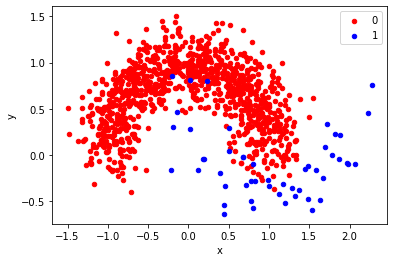

In [2]:
from sklearn.datasets import make_moons


# 데이터 생성
base_x, base_y = make_moons(n_samples=(1000,50), noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=base_x[:,0], y=base_x[:,1], label=base_y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 공통 실행 함수

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

CLASS_0_LABEL = 0
CLASS_1_LABEL = 1
DEFAULT_CLASS_WEIGHT = {CLASS_0_LABEL:1.0, CLASS_1_LABEL:1.0}

def do_classify(x, y, class_weight=DEFAULT_CLASS_WEIGHT):

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

    model = Sequential()
    model.add(Input(2))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

    base_history = model.fit(
        train_x, train_y, epochs=100, batch_size=128, verbose=0, validation_split=0.2,
        class_weight=class_weight
    )


    plt.plot(base_history.history['loss'], label='train_loss')
    plt.plot(base_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    loss, acc = model.evaluate(test_x, test_y)
    print("loss=", loss)
    print("acc=", acc)


    y_ = model.predict(test_x)
    predicted = np.argmax(y_, axis=-1)


    cm = confusion_matrix(test_y, predicted)
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d")

    print(classification_report(test_y, predicted))
    

# 처리 하지 않았을 때

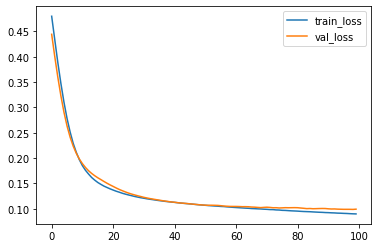

10/10 [==============================] - 0s 2ms/step - loss: 0.0837 - acc: 0.9683
loss= 0.08371222764253616
acc= 0.9682539701461792
[[300   4]
 [  6   5]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       304
           1       0.56      0.45      0.50        11

    accuracy                           0.97       315
   macro avg       0.77      0.72      0.74       315
weighted avg       0.97      0.97      0.97       315



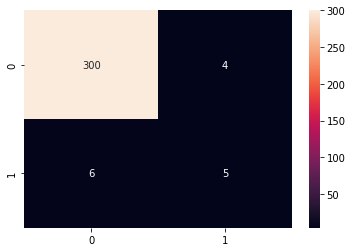

In [4]:
x = base_x.copy()
y = base_y.copy()

do_classify(x, y)

# 오버샘플링

In [5]:
x = base_x.copy()
y = base_y.copy()

In [6]:
class0_x = x[y==0]
class0_y = y[y==0]
class1_x = x[y==1]
class1_y = y[y==1]

print(len(class0_x), len(class1_x))
imbalance_ratio = int(len(class0_x)/len(class1_x))
print(imbalance_ratio)

1000 50
20


In [7]:
class1_x = np.repeat(class1_x, imbalance_ratio, axis=0)
class1_y = np.repeat(class1_y, imbalance_ratio, axis=0)
print(len(class1_x))

1000


In [8]:
print(x.shape)
print(class1_x.shape)
print(y.shape)
print(class1_y.shape)

(1050, 2)
(1000, 2)
(1050,)
(1000,)


In [9]:
x = np.vstack([class0_x, class1_x])
y = np.hstack([class0_y, class1_y])
print(x.shape)
print(y.shape)

(2000, 2)
(2000,)


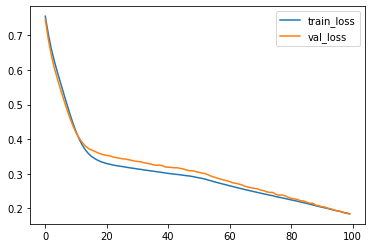

19/19 [==============================] - 0s 2ms/step - loss: 0.1778 - acc: 0.9367
loss= 0.17778272926807404
acc= 0.9366666674613953
[[280  14]
 [ 24 282]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       294
           1       0.95      0.92      0.94       306

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



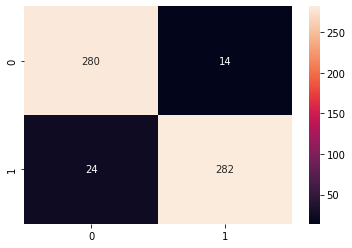

In [10]:
do_classify(x, y)

# 언더샘플링

In [11]:
x = base_x.copy()
y = base_y.copy()

In [12]:
class0_x = x[y==0]
class0_y = y[y==0]
class1_x = x[y==1]
class1_y = y[y==1]

print(len(class0_x), len(class1_x))
class1_count = len(class1_x)
print(class1_count)

1000 50
50


In [13]:
class0_x = class0_x[:class1_count]
class0_y = class0_y[:class1_count]

print(len(class0_x), len(class1_x))

50 50


In [14]:
x = np.vstack([class0_x, class1_x])
y = np.hstack([class0_y, class1_y])
print(x.shape)
print(y.shape)

(100, 2)
(100,)


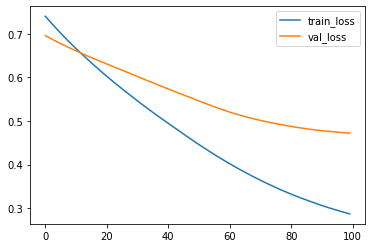

1/1 [==============================] - 0s 18ms/step - loss: 0.5036 - acc: 0.7333
loss= 0.5035920739173889
acc= 0.7333333492279053
[[10  3]
 [ 5 12]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.80      0.71      0.75        17

    accuracy                           0.73        30
   macro avg       0.73      0.74      0.73        30
weighted avg       0.74      0.73      0.73        30



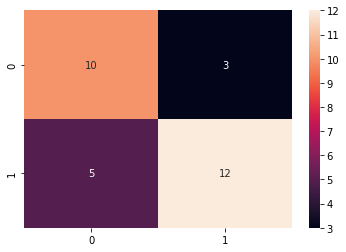

In [15]:
do_classify(x, y)

# class weight

In [16]:
x = base_x.copy()
y = base_y.copy()

In [18]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
print(classes)

class_weight_ratio = compute_class_weight(
    class_weight="balanced", classes=classes, y=y.squeeze())
print(class_weight_ratio)

class_weight = { k:v for k, v in zip(classes, class_weight_ratio) }
print(class_weight)

[0 1]
[ 0.525 10.5  ]
{0: 0.525, 1: 10.5}


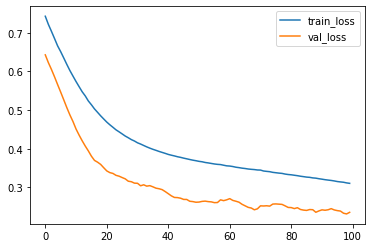

10/10 [==============================] - 0s 2ms/step - loss: 0.3229 - acc: 0.8952
loss= 0.32285207509994507
acc= 0.8952381014823914
[[275  31]
 [  2   7]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       306
           1       0.18      0.78      0.30         9

    accuracy                           0.90       315
   macro avg       0.59      0.84      0.62       315
weighted avg       0.97      0.90      0.92       315



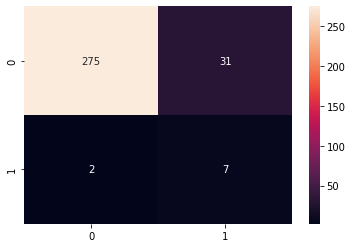

In [19]:
do_classify(x, y, class_weight)

# K-fold 교차 검증


=========================== 1th K-Fold ==============================



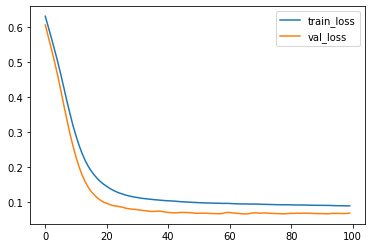

7/7 [==============================] - 0s 2ms/step - loss: 0.1111 - acc: 0.9619
loss= 0.11107105016708374
acc= 0.961904764175415
[[198   1]
 [  7   4]]


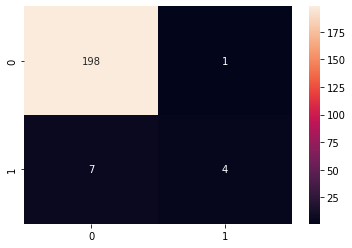

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       199
           1       0.80      0.36      0.50        11

    accuracy                           0.96       210
   macro avg       0.88      0.68      0.74       210
weighted avg       0.96      0.96      0.96       210


=========================== 2th K-Fold ==============================



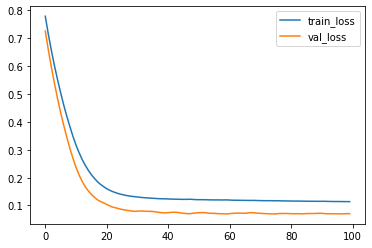

7/7 [==============================] - 0s 2ms/step - loss: 0.0450 - acc: 0.9905
loss= 0.04503537714481354
acc= 0.9904761910438538
[[204   0]
 [  2   4]]


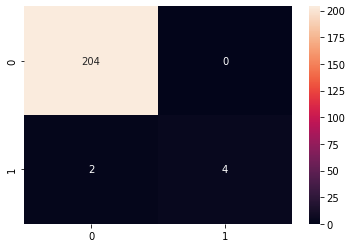

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       204
           1       1.00      0.67      0.80         6

    accuracy                           0.99       210
   macro avg       1.00      0.83      0.90       210
weighted avg       0.99      0.99      0.99       210


=========================== 3th K-Fold ==============================



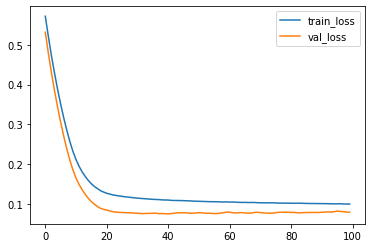

7/7 [==============================] - 0s 2ms/step - loss: 0.0898 - acc: 0.9667
loss= 0.08978809416294098
acc= 0.9666666388511658
[[191   5]
 [  2  12]]


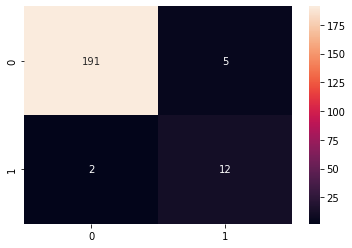

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       196
           1       0.71      0.86      0.77        14

    accuracy                           0.97       210
   macro avg       0.85      0.92      0.88       210
weighted avg       0.97      0.97      0.97       210


=========================== 4th K-Fold ==============================



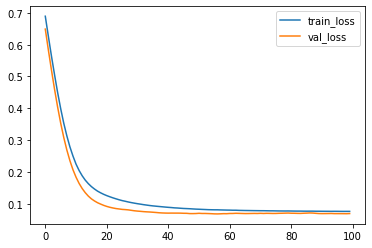

7/7 [==============================] - 0s 2ms/step - loss: 0.1704 - acc: 0.9619
loss= 0.17043709754943848
acc= 0.961904764175415
[[196   0]
 [  8   6]]


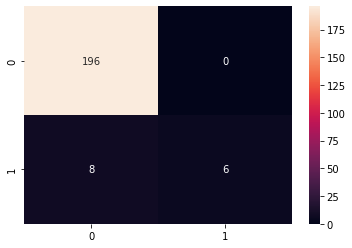

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       196
           1       1.00      0.43      0.60        14

    accuracy                           0.96       210
   macro avg       0.98      0.71      0.79       210
weighted avg       0.96      0.96      0.95       210


=========================== 5th K-Fold ==============================



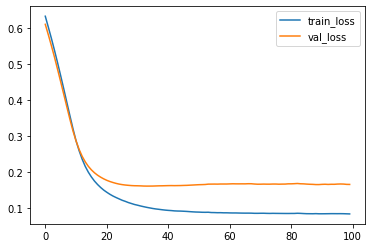

7/7 [==============================] - 0s 2ms/step - loss: 0.0732 - acc: 0.9810
loss= 0.07315201312303543
acc= 0.9809523820877075
[[204   1]
 [  3   2]]


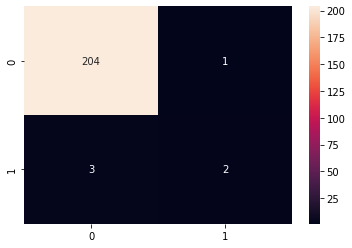

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       205
           1       0.67      0.40      0.50         5

    accuracy                           0.98       210
   macro avg       0.83      0.70      0.75       210
weighted avg       0.98      0.98      0.98       210


=========================== Aggregated ==============================

[[993   7]
 [ 22  28]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.80      0.56      0.66        50

    accuracy                           0.97      1050
   macro avg       0.89      0.78      0.82      1050
weighted avg       0.97      0.97      0.97      1050



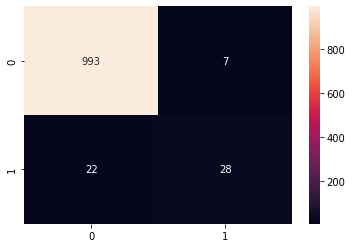

In [25]:
from sklearn.model_selection import KFold

all_test_y = []
all_predicted = []

i = 1
for train_index, test_index in KFold(n_splits=5).split(x, y):
    print()
    print(f"=========================== {i}th K-Fold ==============================")
    print()
    i += 1

    train_x, test_x = x[train_index], x[test_index]
    train_y, test_y = y[train_index], y[test_index]

    model = Sequential()
    model.add(Input(2))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

    base_history = model.fit(train_x, train_y, epochs=100, batch_size=128, verbose=0, validation_split=0.2)


    plt.plot(base_history.history['loss'], label='train_loss')
    plt.plot(base_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    loss, acc = model.evaluate(test_x, test_y)
    print("loss=", loss)
    print("acc=", acc)


    y_ = model.predict(test_x)
    predicted = np.argmax(y_, axis=-1)

    cm = confusion_matrix(test_y, predicted)
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()

    print(classification_report(test_y, predicted))
    all_test_y.extend(test_y)
    all_predicted.extend(predicted)


print()
print(f"=========================== Aggregated ==============================")
print()

cm = confusion_matrix(all_test_y, all_predicted)
print(cm)
plt.show()
sns.heatmap(cm, annot=True, fmt="d")

print(classification_report(all_test_y, all_predicted))
    

# 리샘플링 앙상블